In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pandas as pd

In [2]:
centers=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=None, usecols=(1,2,3))
labels=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=str, usecols=(0))
centers998=np.loadtxt("../../Data/Hagmann/group_mean_region_xyz_centers_file.txt")
labels_rep=np.genfromtxt("../../Data/Hagmann/names_repetitions.txt",dtype=str, usecols=(0))

In [3]:
for label in labels:
    pass
    #print(label[1:])

In [4]:
centers=centers.transpose()
centers998=centers998.transpose()

In [29]:
x66=(centers[1].max()+centers[1].min())/2.0
y66=(centers[0].max()+centers[0].min())/2.0
z66=(centers[2].max()+centers[2].min())/2.0

x998=(centers998[0].max()+centers998[0].min())/2.0
y998=(centers998[1].max()+centers998[1].min())/2.0
z998=(centers998[2].max()+centers998[2].min())/2.0

scale_x=(centers998[0].max()-x998)/(centers[1].max()-x66)*0.95
scale_y=(centers998[1].max()-y998)/(centers[0].max()-y66)*0.95
scale_z=(centers998[2].max()-z998)/(centers[2].max()-z66)*0.95

In [30]:
df998 = pd.DataFrame({'x': centers998[0]-x998,
                   'y': centers998[1]-y998,
                   'z': centers998[2]-z998,
                'label': labels_rep})

df66 = pd.DataFrame({'x': scale_x*(centers[1]-x66),
                   'y': scale_y*(centers[0]-y66),
                   'z': scale_z*(centers[2]-z66),
                'label': labels})

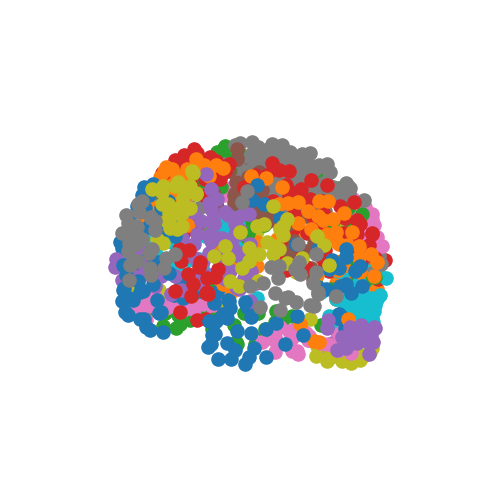

In [70]:
%matplotlib widget
fig2 = plt.figure(figsize=(5,5), dpi=100)
ax2 = fig2.add_subplot(projection='3d')

groups = df998.groupby('label')


for name, group in groups:
    ax2.scatter(group.x, group.y,group.z, marker='o', s=90, label=name,depthshade=False)
    
#ax2.scatter(df66.x,df66.y,df66.z, s=20, c='k',depthshade=False)
#ax2.legend(fontsize=4)
ax2.axis('off')
ax2.set_xlim3d(df66.x.min()+8, df998.x.max()-8)
ax2.set_ylim3d(df66.y.min()+8, df998.y.max()-8)
ax2.set_zlim3d(df66.z.min()+10, df998.z.max()-10)
#ax2.scatter(0,0,0, marker='o', s=20000, c='g',depthshade=False)


# draw sphere
r=40
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
#ax2.plot_surface(x*r, y*r, z*r, color="r")

plt.show()

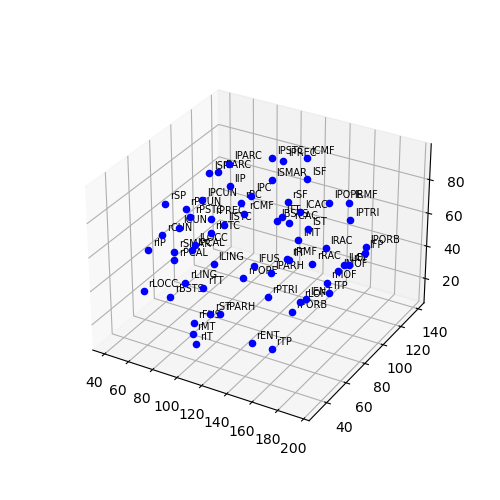

In [82]:
#ax = plt.gca()
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')


for i,label in enumerate(labels):
    ax.scatter(centers[0,i],centers[1,i],centers[2,i], marker='o', color='blue',depthshade=True)
    #print(label)
    ax.text(centers[0,i]+2,centers[1,i]+2,centers[2,i]+2, label, size=7)

#ax.scatter(centers998[0],centers998[1],centers998[2], marker='o', color='red')
#ax.set_xlim3d(centers998[0].min()+8, centers998[0].max()-8)
#ax.set_ylim3d(centers998[1].min()+8, centers998[1].max()-8)
#ax.set_zlim3d(centers998[2].min()+10, centers998[2].max()-10)
plt.show()

In [10]:
centers998.shape

(3, 998)

In [11]:
x66=(centers[1].max()+centers[1].min())/2.0
y66=(centers[0].max()+centers[0].min())/2.0
z66=(centers[2].max()+centers[2].min())/2.0

x998=(centers998[0].max()+centers998[0].min())/2.0
y998=(centers998[1].max()+centers998[1].min())/2.0
z998=(centers998[2].max()+centers998[2].min())/2.0

scale_x=(centers998[0].max()-x998)/(centers[1].max()-x66)*0.9
scale_y=(centers998[1].max()-y998)/(centers[0].max()-y66)*0.9
scale_z=(centers998[2].max()-z998)/(centers[2].max()-z66)*0.9


print((x66,y66,z66),(x998,y998,z998),sep='\n')

(84.6238086, 117.0998746, 52.843971100000005)
(0.715600000000002, -17.3243, 16.4789)


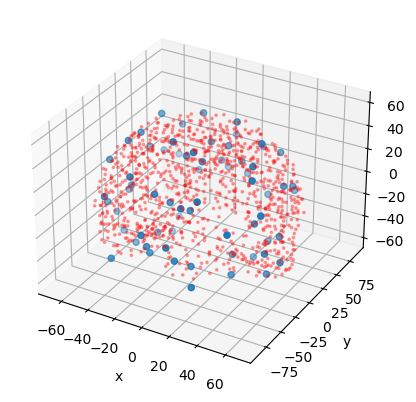

In [12]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(projection='3d')

#for i,label in enumerate(labels):
#    ax.scatter(centers[1,i],centers[0,i], marker='o', color='blue')
#    #print(label)
#    ax.text(centers[1,i]+2,centers[0,i]+2, label, size=10)
ax.scatter(scale_x*(centers[1]-x66), scale_y*(centers[0]-y66), scale_z*(centers[2]-z66))

ax.scatter(centers998[0]-x998,centers998[1]-y998,centers998[2]-z998, marker='o', color='red', alpha=0.3, s=3)
#ax.set_xlim3d(centers998[0].min()+8, centers998[0].max()-8)
#ax.set_ylim3d(centers998[1].min()+8, centers998[1].max()-8)
#ax.set_zlim3d(centers998[2].min()+10, centers998[2].max()-10)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [13]:
print('x:',(centers[0].min(), centers[0].max()),
      '\ny:',(centers[1].min(), centers[1].max()),
      '\nz:',(centers[2].min(), centers[2].max()))

x: (41.1017281, 193.0980211) 
y: (30.2652501, 138.9823671) 
z: (10.7984631, 94.8894791)


In [14]:
print('x:',(centers998[0].min(), centers998[0].max()),
      '\ny:',(centers998[1].min(), centers998[1].max()),
      '\nz:',(centers998[2].min(), centers998[2].max()))

x: (-67.0183, 68.4495) 
y: (-105.36, 70.7114) 
z: (-43.8641, 76.8219)
